In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import pandas as pd
import category_encoders as ce
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from src.utils import model_utils
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from collections import Counter


In [2]:
X = pd.read_csv('../data/input/X_train.csv')
y = pd.read_csv('../data/input/y_train.csv')

In [3]:
target_encoder = ce.TargetEncoder()
X = target_encoder.fit_transform(X, y)
X.head()

,index,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,C14,C15,C16,C17,C18,C19,C21,dayofweek,day,hour
0,18201910,1005,0,0.118590,0.122438,0.128065,0.188735,0.182843,0.093020,0.147823,...,16615,320,50,1863,3,39,23,5,25,12
1,35141968,1005,1,0.298257,0.260324,0.180248,0.198970,0.195158,0.199443,0.174547,...,17264,320,50,1872,3,39,23,2,29,15
2,11358550,1005,0,0.118590,0.122438,0.128065,0.010814,0.023289,0.093020,0.174547,...,21191,320,50,2424,1,161,71,3,23,10
3,36241996,1005,0,0.118590,0.122438,0.128065,0.147823,0.111282,0.107986,0.174547,...,20751,320,50,1895,0,681,101,3,30,0
4,2987382,1005,0,0.205980,0.205980,0.208215,0.198970,0.195158,0.199443,0.174547,...,21724,320,50,2502,0,35,221,1,21,15


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size= 0.3, random_state= 42)

In [5]:
outcome = pd.DataFrame()
dummy_clf = DummyClassifier(strategy= "most_frequent")
dummy_clf.fit(X_train, y_train)
temp = model_utils.store_results(name='DummyClassifier',
                                 X_train=X_train,
                                 y_train=y_train,
                                 X_test=X_test,
                                 y_test=y_test,
                                 model=dummy_clf,
                                 folds=5)

outcome = pd.concat([outcome,temp])
outcome

Training data confusion matrix: 
 [[1174557       0]
 [ 240456       0]]
Test data confusion matrix: 
 [[503382      0]
 [103053      0]]


/home/stefan/PycharmProjects/exploration-ctr/src/utils/model_utils.py:21: RuntimeWarning: invalid value encountered in scalar divide
  recall = TP / (TP + FP)


,model-name,accuracy-train,precision-train,recall-train,accuracy_test,precision-test,recall-test,cross-val-mean,cross-val-1,cross-val-2,cross-val-3,cross-val-4,cross-val-5
0,DummyClassifier,0.830068,0.0,NaN,0.830068,0.0,NaN,0.830068,0.830069,0.830069,0.830065,0.830068,0.830068


In [6]:
scaler = MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_train.head()

,index,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,C14,C15,C16,C17,C18,C19,C21,dayofweek,day,hour
281816,0.700998,0.363636,0.0,0.242860,0.287645,0.404588,0.206170,0.30328,0.587333,0.219592,...,0.907547,0.221239,0.02988,0.911565,0.0,0.001107,0.866142,0.166667,0.777778,0.347826
1466266,0.272648,0.363636,0.0,0.139823,0.170980,0.248846,0.195564,0.28352,0.247509,0.174786,...,0.027960,0.221239,0.02988,0.024943,1.0,0.716501,0.055118,0.500000,0.222222,0.391304
956504,0.884906,0.363636,0.0,0.034133,0.028752,0.404588,0.206170,0.30328,0.587333,0.219592,...,0.831862,0.221239,0.02988,0.823507,1.0,0.001107,0.165354,0.333333,0.888889,0.826087
606180,0.704483,0.363636,0.0,0.139823,0.170980,0.248846,0.074972,0.10605,0.295297,0.219592,...,0.961651,0.221239,0.02988,0.964853,0.0,0.000554,0.866142,0.166667,0.777778,0.347826
1105485,0.086895,0.363636,0.0,0.242860,0.287645,0.404588,0.206170,0.30328,0.587333,0.219592,...,0.901719,0.221239,0.02988,0.903250,0.0,0.001107,0.866142,0.166667,0.000000,0.782609


In [7]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, np.ravel(y_train))

LogisticRegression(max_iter=1000)

In [8]:
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])
X_test.head(2)

,index,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,C14,C15,C16,C17,C18,C19,C21,dayofweek,day,hour
1620562,0.778320,0.363636,0.000000,0.593128,0.702505,0.404588,0.20617,0.30328,0.587333,0.219592,...,0.974068,0.221239,0.02988,0.972033,0.666667,0.716501,0.200787,0.166667,0.777778,0.782609
453130,0.068612,0.363636,0.142857,0.283452,0.335722,0.350244,0.20617,0.30328,0.587333,0.219592,...,0.842041,0.221239,0.02988,0.630385,0.000000,0.929125,0.185039,0.166667,0.000000,0.565217


In [9]:
y_pred = model.predict(X_test)
temp = model_utils.store_results(name='LogisticRegression',
                                 X_train=X_train,
                                 y_train=np.ravel(y_train),
                                 X_test=X_test,
                                 y_test=y_test,
                                 model=model,
                                 folds=5)
outcome = pd.concat([outcome,temp])
outcome

Training data confusion matrix: 
 [[1133758   40799]
 [  96231  144225]]
Test data confusion matrix: 
 [[485991  17391]
 [ 41103  61950]]


,model-name,accuracy-train,precision-train,recall-train,accuracy_test,precision-test,recall-test,cross-val-mean,cross-val-1,cross-val-2,cross-val-3,cross-val-4,cross-val-5
0,DummyClassifier,0.830068,0.000000,NaN,0.830068,0.000000,NaN,0.830068,0.830069,0.830069,0.830065,0.830068,0.830068
0,LogisticRegression,0.903160,0.599798,0.779493,0.903544,0.601147,0.780807,0.903161,0.903012,0.902962,0.903160,0.903495,0.903174


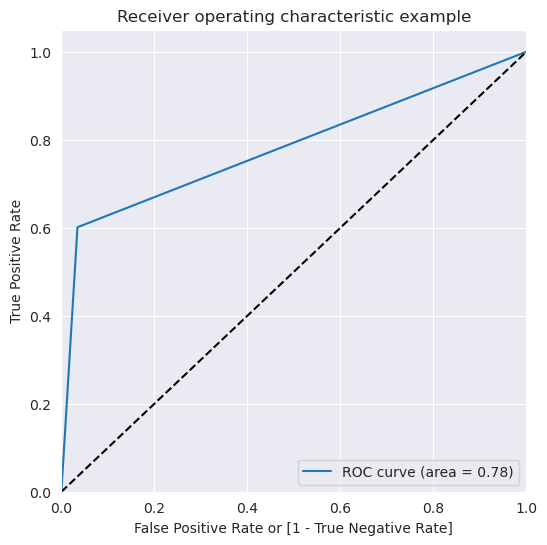

FPR [0.         0.03454832 1.        ] 
TPR [0.         0.60114698 1.        ], 
THRESHOLDS [2 1 0]


In [10]:
fpr, tpr, thresholds = model_utils.draw_roc(model, X_test, y_test)
print(f'FPR {fpr} \nTPR {tpr}, \nTHRESHOLDS {thresholds}')

Original dataset shape : Counter({0: 1677939, 1: 343509})
Resampled dataset shape : Counter({0: 1677939, 1: 1677939})


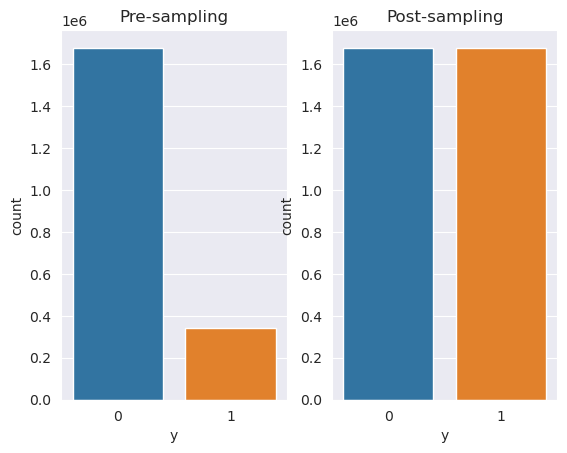

In [11]:
random_sample = RandomOverSampler()
X_new, y_new = random_sample.fit_resample(X, y)
print(f'Original dataset shape : {Counter(y["y"])}')
print(f'Resampled dataset shape : {Counter(y_new["y"])}')
fig, ax = plt.subplots(1, 2)
ax[0].set_title('Pre-sampling')
ax[1].set_title('Post-sampling')
sns.countplot(data=y, x='y', ax=ax[0])
sns.countplot(data=y_new, x='y', ax=ax[1])
plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, stratify=y_new, test_size=0.3, random_state=1234)

In [13]:
y_train.shape

(2349114, 1)

In [14]:
scaler = MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_train.head(2)

,index,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,C14,C15,C16,C17,C18,C19,C21,dayofweek,day,hour
2950751,0.262420,0.363636,0.0,0.379304,0.449251,0.077928,0.20617,0.30328,0.587333,0.219592,...,0.254171,0.221239,0.02988,0.164399,1.000000,0.007752,0.086614,0.500000,0.222222,0.260870
2608496,0.059785,0.363636,0.0,0.150131,0.177816,0.552600,0.20617,0.30328,0.587333,0.219592,...,0.261351,0.221239,0.02988,0.173847,0.666667,0.003322,0.122047,0.166667,0.000000,0.478261


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, np.ravel(y_train))

In [16]:
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])
y_pred = model.predict(X_test)
temp = model_utils.store_results(name='LogisticRegressionRandomOverSampler',
                                 X_train=X_train,
                                 y_train=np.ravel(y_train),
                                 X_test=X_test,
                                 y_test=y_test,
                                 model=model,
                                 folds=5)
outcome = pd.concat([outcome,temp])
outcome

Training data confusion matrix: 
 [[1009884  164673]
 [ 183471  991086]]
Test data confusion matrix: 
 [[432923  70459]
 [ 78849 424533]]


,model-name,accuracy-train,precision-train,recall-train,accuracy_test,precision-test,recall-test,cross-val-mean,cross-val-1,cross-val-2,cross-val-3,cross-val-4,cross-val-5
0,DummyClassifier,0.830068,0.000000,NaN,0.830068,0.000000,NaN,0.830068,0.830069,0.830069,0.830065,0.830068,0.830068
0,LogisticRegression,0.903160,0.599798,0.779493,0.903544,0.601147,0.780807,0.903161,0.903012,0.902962,0.903160,0.903495,0.903174
0,LogisticRegressionRandomOverSampler,0.851798,0.843796,0.857520,0.851695,0.843362,0.857656,0.851776,0.851631,0.852095,0.851663,0.851353,0.852140
